In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import seaborn as sns
import pyreadr

import copy

from load_data import load_expression
from model import SpiceMix
from Result import SpiceMixResult

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: flex;
    justify-content: center;
}
</style>
""")

In [3]:
import h5py

In [4]:
with h5py.File("../../data/aggregate_separate_fovs/results_with_spatial_high_lambda.hdf5", 'r') as h5file:
    print(h5file["weights"]["0"].keys())

<KeysViewHDF5 ['0', '10', '100', '110', '120', '130', '140', '150', '160', '170', '180', '190', '20', '200', '210', '220', '230', '240', '250', '260', '270', '280', '290', '30', '300', '310', '320', '40', '50', '60', '70', '80', '90']>


In [5]:
cardiac_development_spatial_result = SpiceMixResult(
    path2dataset='../../data/aggregate_separate_fovs',
    result_filename="../../data/aggregate_separate_fovs/results_with_spatial_low_lambda.hdf5",
    neighbor_suffix="",
)

cardiac_development_nmf_result = SpiceMixResult(
    path2dataset='../../data/aggregate_separate_fovs',
    result_filename="../../data/aggregate_separate_fovs/results_with_spatial_high_lambda.hdf5",
    neighbor_suffix="",
)

Result file = ../../data/aggregate_separate_fovs/results_with_spatial_low_lambda.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:112: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Result file = ../../data/aggregate_separate_fovs/results_with_spatial_high_lambda.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:112: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Found 306 iterations from ../../data/aggregate_separate_fovs/results_with_spatial_low_lambda.hdf5
Found 321 iterations from ../../data/aggregate_separate_fovs/results_with_spatial_high_lambda.hdf5


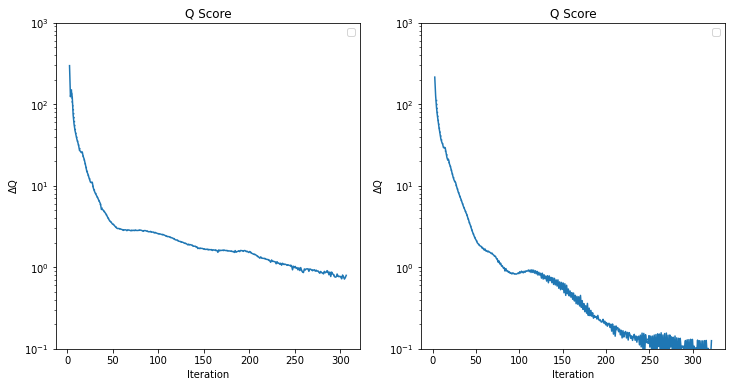

In [6]:
# Prior to downstream analysis, we should make sure the models have converged
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
cardiac_development_spatial_result.plot_convergence(axes[0], label='SpiceMix', c='C0')
cardiac_development_nmf_result.plot_convergence(axes[1], label='NMF', c='C0')

In [7]:
# Load latent states for all cells estimated by the last iteration of SpiceMix/NMF
cardiac_development_spatial_result.load_latent_states(iiter=-1)
cardiac_development_nmf_result.load_latent_states(iiter=-1)

Iteration -1


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:112: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1


optimal K = 8
#clusters = 8, #-1 = 0
optimal K = 6
#clusters = 6, #-1 = 0


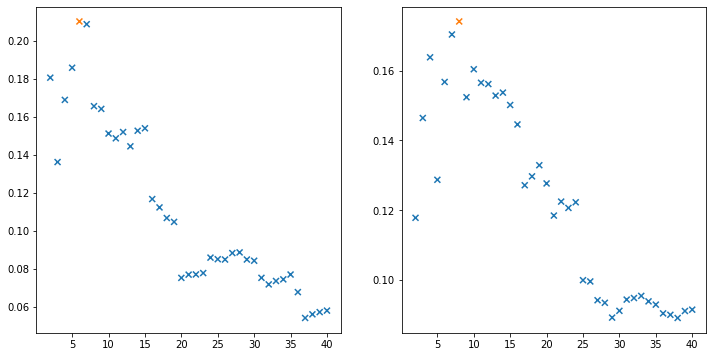

In [8]:
# Do hierarchical clustering on ALL cells in the latent space
# TODO: accelerate this function for datasets of 10k+ cells 
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
cardiac_development_nmf_result.determine_optimal_clusters(axes[1], K_range=np.arange(2, 41), metric="silhouette")
cardiac_development_spatial_result.determine_optimal_clusters(axes[0], K_range=np.arange(2, 41), metric="silhouette")

In [9]:
cardiac_development_spatial_result.determine_clusters(12)
cardiac_development_nmf_result.determine_clusters(12)

array([3, 3, 3, ..., 8, 8, 8])

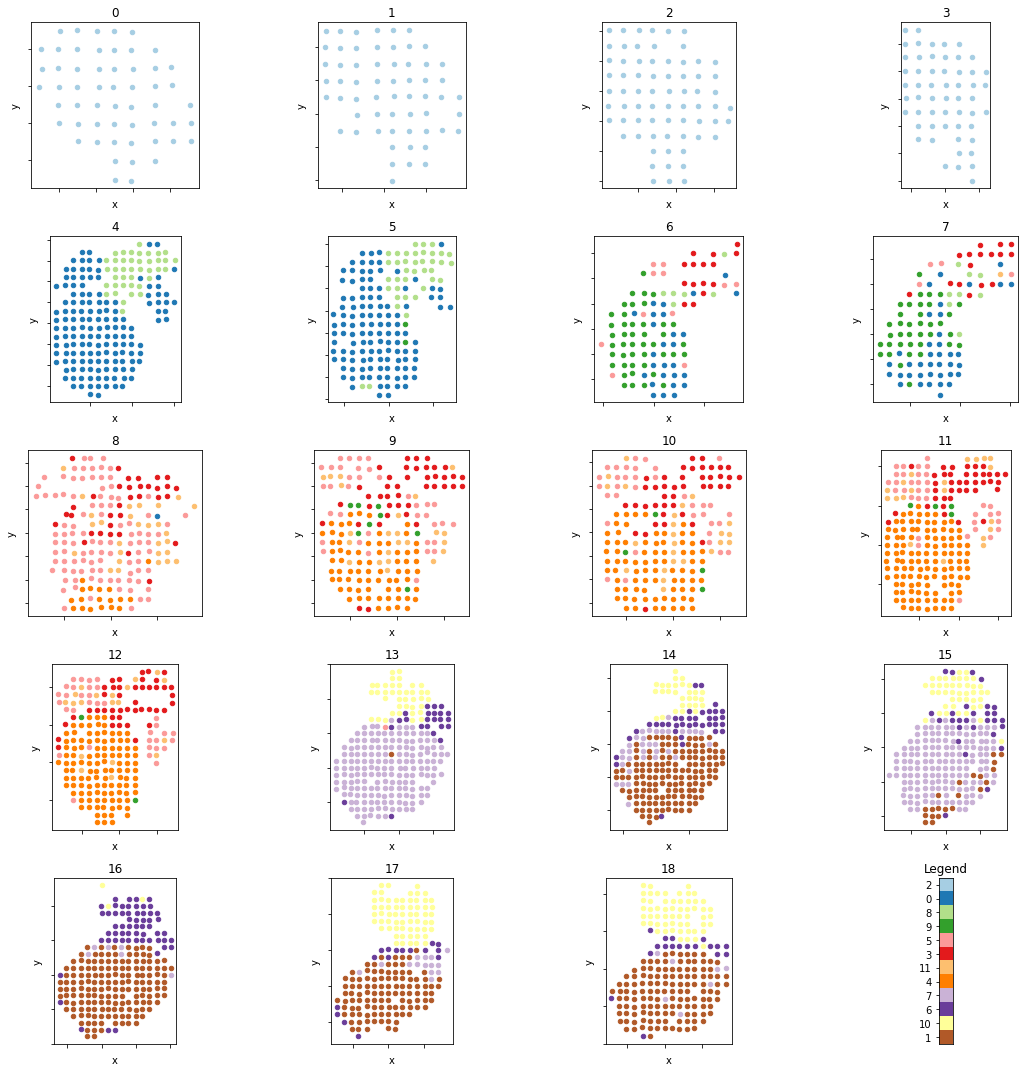

In [10]:
num_replicates = cardiac_development_spatial_result.num_repli

plot_height = int(np.sqrt(num_replicates))
plot_width = num_replicates // plot_height

if plot_height * plot_width < num_replicates:
    plot_width += 1

fig, axes = plt.subplots(plot_width, plot_height, figsize=(plot_height * 4, plot_width * 3))

cardiac_development_spatial_result.plot_multireplicate(axes, "cluster", palette_option="Paired")

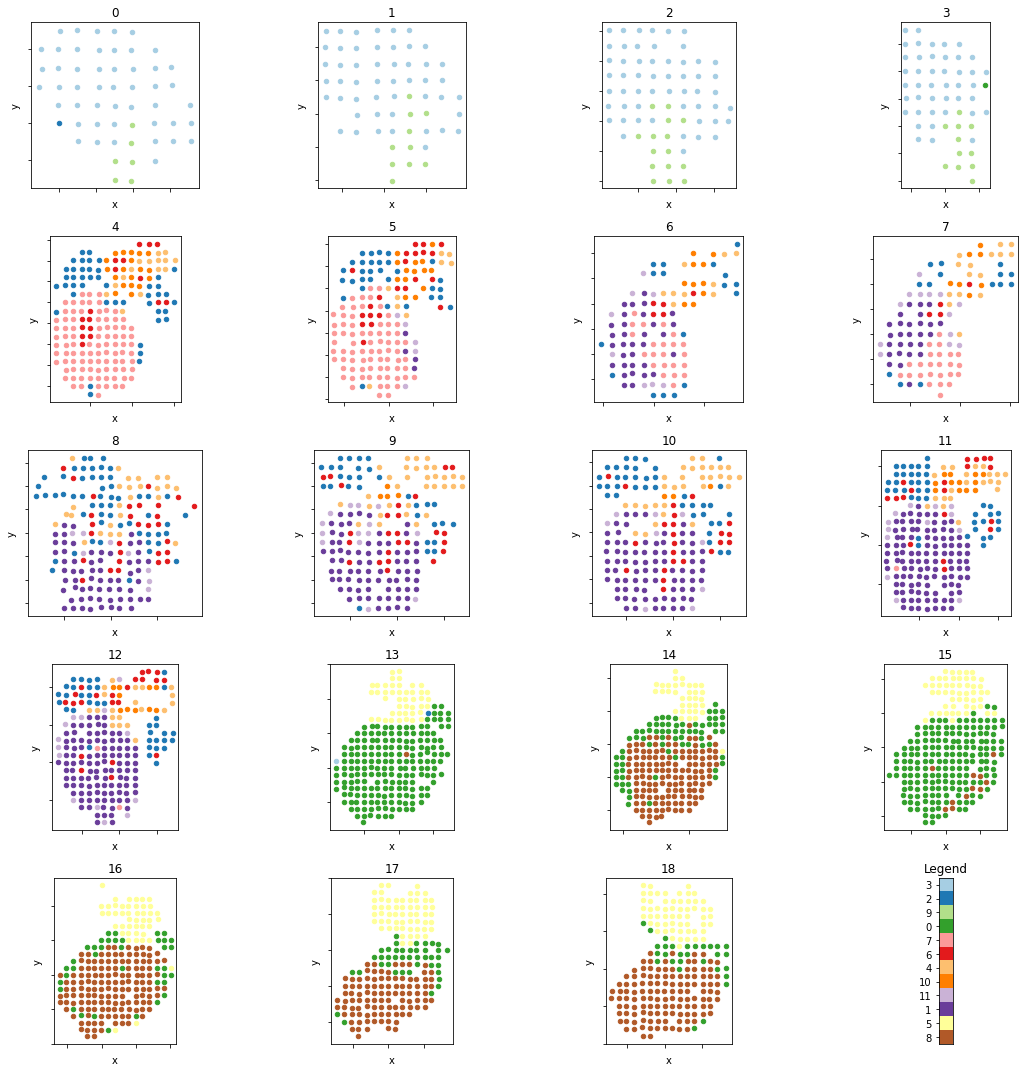

In [11]:
num_replicates = cardiac_development_nmf_result.num_repli

plot_height = int(np.sqrt(num_replicates))
plot_width = num_replicates // plot_height

if plot_height * plot_width < num_replicates:
    plot_width += 1

fig, axes = plt.subplots(plot_width, plot_height, figsize=(plot_height * 4, plot_width * 3))

cardiac_development_nmf_result.plot_multireplicate(axes, "cluster", palette_option="Paired")

In [12]:
replicate = "18"

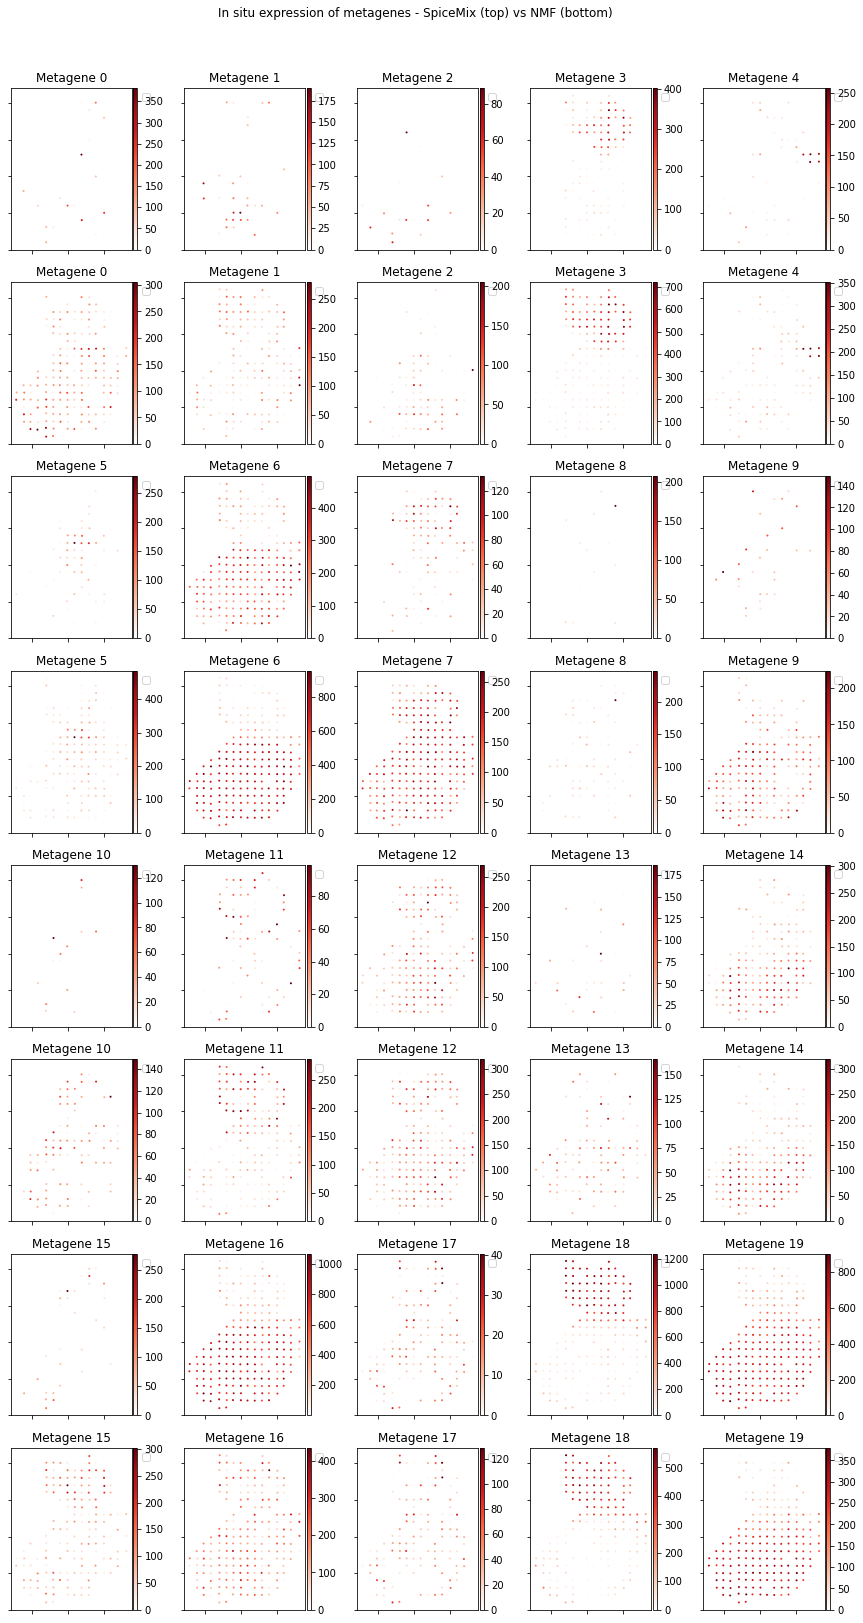

In [13]:
# We ovrlap latent states on the spatial space
# SpiceMix metagenes are expected to show clearer spatial patterns with less background expressions
segmentdata = copy.deepcopy(plt.get_cmap('Reds')._segmentdata)
segmentdata['red'  ][0] = (0., 1., 1.)
segmentdata['green'][0] = (0., 1., 1.)
segmentdata['blue' ][0] = (0., 1., 1.)
cmap = LinearSegmentedColormap('', segmentdata=segmentdata, N=256)

plot_height = 8
plot_width = 5
fig, axes = plt.subplots(plot_height, plot_width, figsize=(plot_width * 3, plot_height * 3.5))
fig.suptitle('In situ expression of metagenes - SpiceMix (top) vs NMF (bottom)', y=.92)
cardiac_development_spatial_result.plot_metagenes(axes[[0, 2, 4, 6]], s=1, cmap=cmap, replicate=replicate)
cardiac_development_nmf_result.plot_metagenes(axes[[1, 3, 5, 7]], s=1, cmap=cmap, replicate=replicate)
plt.show()

In [15]:
# do dimensionality reduction by UMAP
kwargs=dict(
    n_components=2,
    n_neighbors=30,
    min_dist=0.2,
    random_state=0,
)
cardiac_development_spatial_result.UMAP(**kwargs)
cardiac_development_nmf_result.UMAP(**kwargs)

Text(0.5, 1.0, 'Replicates')

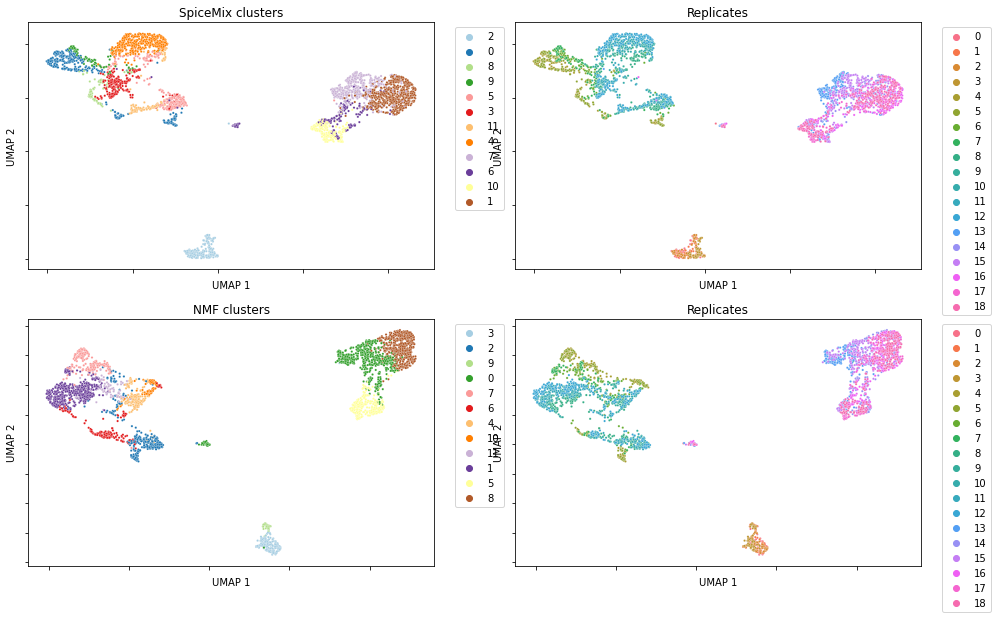

In [16]:
kwargs = dict(s=5)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
cardiac_development_spatial_result.plot_feature(axes[0, 0], 'cluster', key_x='UMAP 1', key_y='UMAP 2', **kwargs)
cardiac_development_spatial_result.plot_feature(axes[0, 1], 'replicate', key_x='UMAP 1', key_y='UMAP 2', **kwargs)

cardiac_development_nmf_result.plot_feature(axes[1, 0], 'cluster', key_x='UMAP 1', key_y='UMAP 2', **kwargs)
cardiac_development_nmf_result.plot_feature(axes[1, 1], 'replicate', key_x='UMAP 1', key_y='UMAP 2', **kwargs)

axes[0, 0].set_title('SpiceMix clusters')
axes[0, 1].set_title('Replicates')
axes[1, 0].set_title('NMF clusters')
axes[1, 1].set_title('Replicates')

# Overlaying Region Labels

In [41]:
spatiotemporal_cardiac_dataframe = pd.read_csv("../../../Developmental_heart/data/ST_heart_spot_data.csv")
np.unique(spatiotemporal_cardiac_dataframe["image"])
spatiotemporal_cardiac_dataframe

,Unnamed: 0,x,y,intensity,area,id,color,color2,acronym,name,right.left,rostral.caudal,anterior.posterior,spot.id,nuclei,image,spot.pos
0,537,17044.091797,14752.305664,0.0,31934,17.0,#0B61A4,NaN,LV,left ventricle,171.676556,486.162499,192,537,30,1_CN73_E1_HE,15x16
1,550,15557.391602,14725.599609,0.0,30502,17.0,#0B61A4,#41b6c4,LV,left ventricle,87.430699,447.660606,192,550,34,1_CN73_E1_HE,17x16
2,556,16338.518555,14749.410156,0.0,36820,17.0,#0B61A4,#41b6c4,LV,left ventricle,132.928461,471.661786,192,556,38,1_CN73_E1_HE,16x16
3,565,17027.894531,14057.102539,0.0,32274,17.0,#0B61A4,#41b6c4,LV,left ventricle,177.676260,451.160778,192,565,28,1_CN73_E1_HE,15x17
4,566,14857.407227,14019.449219,0.0,20654,17.0,#0B61A4,#41b6c4,LV,left ventricle,32.183417,373.656966,192,566,20,1_CN73_E1_HE,18x17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,5554,13864.000000,15708.000000,0.0,26296,NaN,#000000,#d3d3d3,NaN,NaN,409.668607,185.802477,353,555,19,9_CN74_C1_HE,20x17
1463,5841,16669.105469,14959.999023,0.0,26276,8.0,#d3d3d3,#d3d3d3,WH,whole heart,448.057839,207.461195,353,584,5,9_CN74_C1_HE,16x18
1464,5853,15893.106445,14959.999023,0.0,26276,8.0,#d3d3d3,#d3d3d3,WH,whole heart,434.149664,198.954520,353,585,17,9_CN74_C1_HE,17x18
1465,5862,15276.000000,14960.000000,0.0,26296,8.0,#d3d3d3,#d3d3d3,WH,whole heart,407.739452,197.414974,353,586,8,9_CN74_C1_HE,18x18


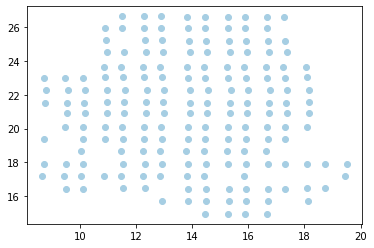

In [38]:
x, y = spatiotemporal_cardiac_dataframe[spatiotemporal_cardiac_dataframe["image"] == "9_CN74_C1_HE"][["x", "y"]].T.values / 1000
plt.scatter(x,y)

# Comparing to SpatialDE AEH Results

In [31]:
# Three available timepoints: 5 weeks, 6 weeks, and 9 weeks
timepoint = 9
# Point in space
sample = 5

In [32]:
histology_results = pd.read_csv(f"../../../spatial_de_test/results/{timepoint}/histology_results_{sample}.tsv", sep="\t", index_col=0)
patterns = pd.read_csv(f"../../../spatial_de_test/results/{timepoint}/patterns_{sample}.tsv", sep="\t", index_col=0)
coordinates = pd.read_csv(f"../../../spatial_de_test/results/{timepoint}/coordinates_{sample}.tsv", sep="\t", index_col=0)

In [33]:
valid_patterns = np.unique(histology_results["pattern"].values)

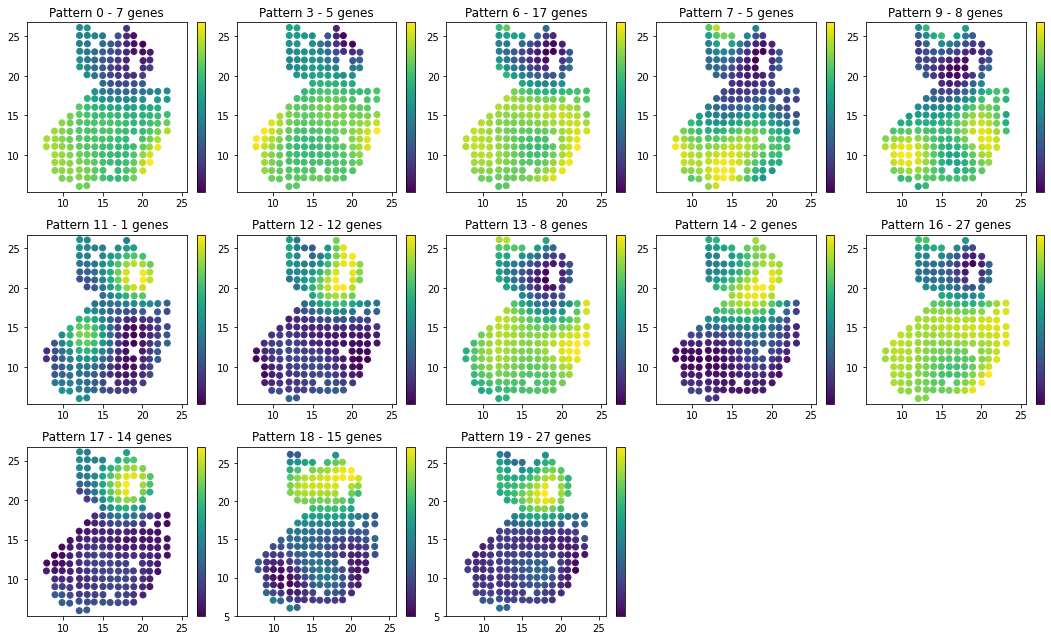

In [34]:
plot_height = np.sqrt(len(valid_patterns)).astype(int)
plot_width = len(valid_patterns) // plot_height + 1
plt.figure(figsize=(plot_width * 3, plot_height * 3))
for index, pattern in enumerate(valid_patterns):
    pattern_string = str(pattern)
    
    plt.subplot(plot_height, plot_width, index + 1)
    plt.scatter(coordinates['new_x'], coordinates['new_y'], c=patterns[pattern_string]);
    plt.axis('equal')
    plt.title('Pattern {} - {} genes'.format(pattern, histology_results.query('pattern == @pattern').shape[0] ))
    plt.colorbar(ticks=[])
    plt.tight_layout(h_pad=1, w_pad=1)

In [35]:
correlations = cardiac_development_spatial_result.calculate_metagene_correlations(replicate, patterns, valid_patterns.astype(str))

In [36]:
correlations

,0,3,6,7,9,11,12,13,14,16,17,18,19
Metagene 0,-0.012282,-0.034373,-0.009863,0.028757,-0.015455,-0.052445,0.044973,-0.035421,0.002093,-0.017831,0.022059,0.004016,0.012977
Metagene 1,0.115289,0.014366,0.049141,0.253125,0.095449,-0.043903,-0.086616,0.105615,-0.200383,0.044487,-0.076816,-0.115266,-0.129455
Metagene 2,0.105757,0.048895,0.039887,0.176134,0.053789,-0.098547,-0.075395,0.01239,-0.124947,0.027972,-0.040423,-0.03562,-0.039327
Metagene 3,-0.763245,-0.698549,-0.798471,-0.560824,-0.678616,0.589888,0.79551,-0.777981,0.644748,-0.805705,0.833129,0.708429,0.781441
Metagene 4,-0.099967,-0.019713,-0.023249,-0.170419,0.024865,0.016856,0.085076,0.011098,0.044816,0.062054,-0.061626,-0.001977,0.051087
Metagene 5,-0.182834,0.036786,-0.01448,-0.278276,-0.257257,0.005555,0.18171,-0.161836,0.339889,-0.016511,0.063137,0.116422,0.181022
Metagene 6,0.581727,0.543186,0.624492,0.310386,0.52249,-0.378089,-0.643551,0.660748,-0.51663,0.632135,-0.639792,-0.576553,-0.675401
Metagene 7,-0.584875,-0.493766,-0.583044,-0.500644,-0.559998,0.346834,0.55775,-0.592769,0.50533,-0.581165,0.543283,0.597504,0.593102
Metagene 8,-0.147409,-0.198224,-0.173453,-0.140512,-0.133473,0.131282,0.156642,-0.16031,0.121029,-0.188401,0.177732,0.151059,0.144092
Metagene 9,-0.055489,-0.037353,-0.047501,-0.045533,-0.100013,0.14386,0.055122,-0.036419,0.090051,-0.046404,0.03361,0.075441,0.036691


In [37]:
(correlations).astype(float).idxmax(axis="columns")

Metagene 0     12
Metagene 1      7
Metagene 2      7
Metagene 3     17
Metagene 4     12
Metagene 5     14
Metagene 6     13
Metagene 7     18
Metagene 8     17
Metagene 9     11
Metagene 10    11
Metagene 11    18
Metagene 12    17
Metagene 13     7
Metagene 14     7
Metagene 15    17
Metagene 16     0
Metagene 17    14
Metagene 18    19
Metagene 19     6
dtype: object

Text(0.5, 1.0, 'Pattern 7')

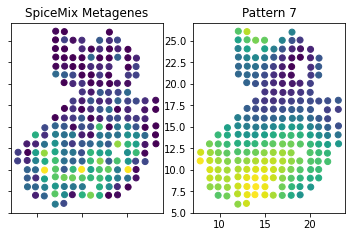

In [38]:
pattern = "7"
plot_height = 1
plot_width = 2
fig, axes = plt.subplots(plot_height, plot_width, figsize=(plot_width * 3, plot_height * 3.5))

metagene_axis, spatial_de_axis = axes
cardiac_development_spatial_result.plot_aggregated_feature(metagene_axis, ["Metagene 1", "Metagene 2", "Metagene 13", "Metagene 14"], replicate=replicate, show_colorbar=False)
spatial_de_axis.scatter(coordinates['new_x'], coordinates['new_y'], c=patterns[pattern])

metagene_axis.set_title("SpiceMix Metagenes")
spatial_de_axis.set_title(f"Pattern {pattern}")

In [39]:
histology_results.query(f"pattern == {int(pattern)}")

,g,pattern,membership
1961,ENSG00000213269.2,7,0.998808
2387,ENSG00000250321.1,7,0.999324
2420,ENSG00000078114.18,7,0.999994
2464,ENSG00000113430.9,7,0.999999
2635,ENSG00000235174.1,7,1.000000


In [40]:
print('Pattern {}'.format(pattern))
pattern_genes = ', '.join(histology_results.query(f'pattern == {pattern}').sort_values('membership')['g'].tolist())
print(pattern_genes)

Pattern 7
ENSG00000213269.2, ENSG00000250321.1, ENSG00000078114.18, ENSG00000113430.9, ENSG00000235174.1


In [43]:
import mygene

mg = mygene.MyGeneInfo()

result = mg.querymany(pattern_genes, scopes="symbol", fields=["ensembl"], species="human")
result

querying 1-5...done.
Finished.
5 input query terms found no hit:
	['ENSG00000213269.2', 'ENSG00000250321.1', 'ENSG00000078114.18', 'ENSG00000113430.9', 'ENSG000002351
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


[{'query': 'ENSG00000213269.2', 'notfound': True},
 {'query': 'ENSG00000250321.1', 'notfound': True},
 {'query': 'ENSG00000078114.18', 'notfound': True},
 {'query': 'ENSG00000113430.9', 'notfound': True},
 {'query': 'ENSG00000235174.1', 'notfound': True}]

In [20]:
# do dimensionality reduction by UMAP
kwargs=dict(
    n_components=2,
    n_neighbors=30,
    min_dist=0.2,
    random_state=0,
)
cardiac_development_spatial_result.UMAP(**kwargs)
cardiac_development_nmf_result.UMAP(**kwargs)

Iteration 200
Iteration 200


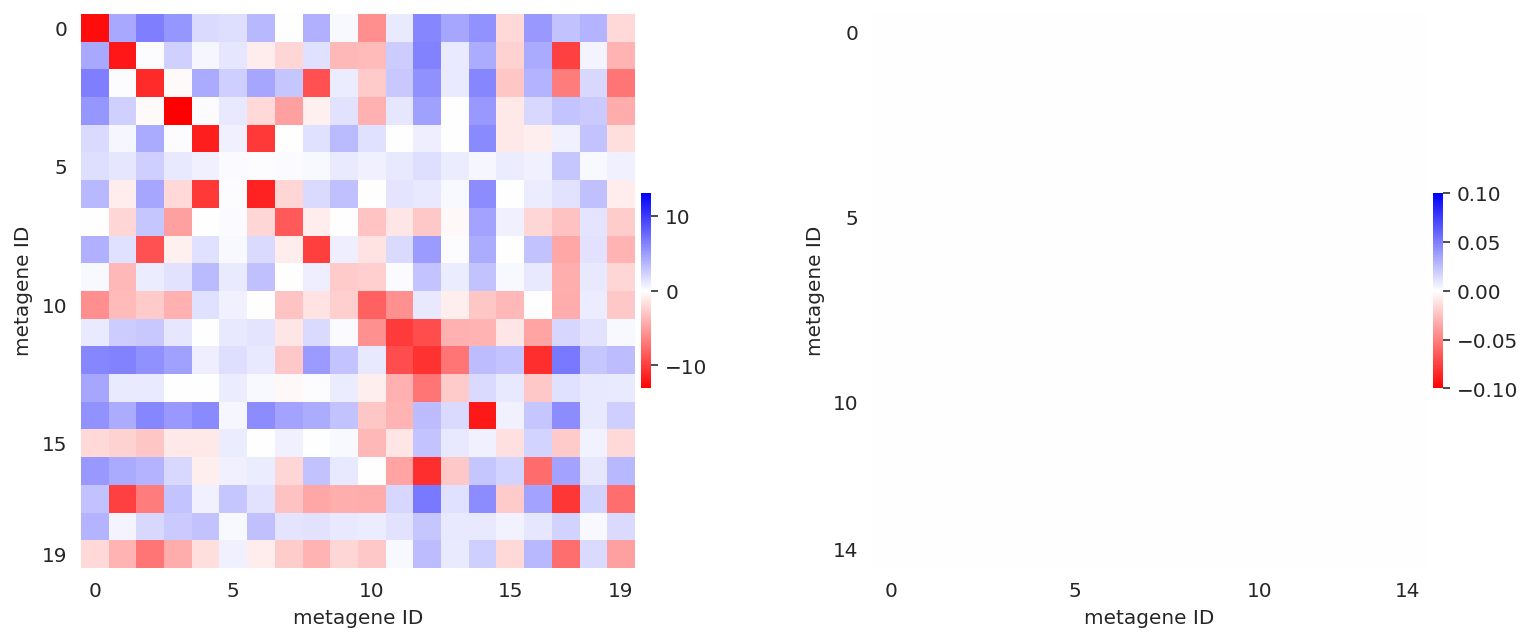

In [17]:
segmentdata = copy.deepcopy(plt.get_cmap('bwr')._segmentdata)
for key in ['red', 'green', 'blue']:
    segmentdata[key] = [(1.-i, k, j) for (i, j, k) in segmentdata[key][::-1]]
cm = matplotlib.colors.LinearSegmentedColormap('', segmentdata=segmentdata, N=256)
kwargs = dict(
    cmap=cm,
)

fig, axes = plt.subplots(1, 2, figsize=(13, 6))
obj_SpiceMix.plotAffinityMetagenes(axes[0], iteration=-1, **kwargs)

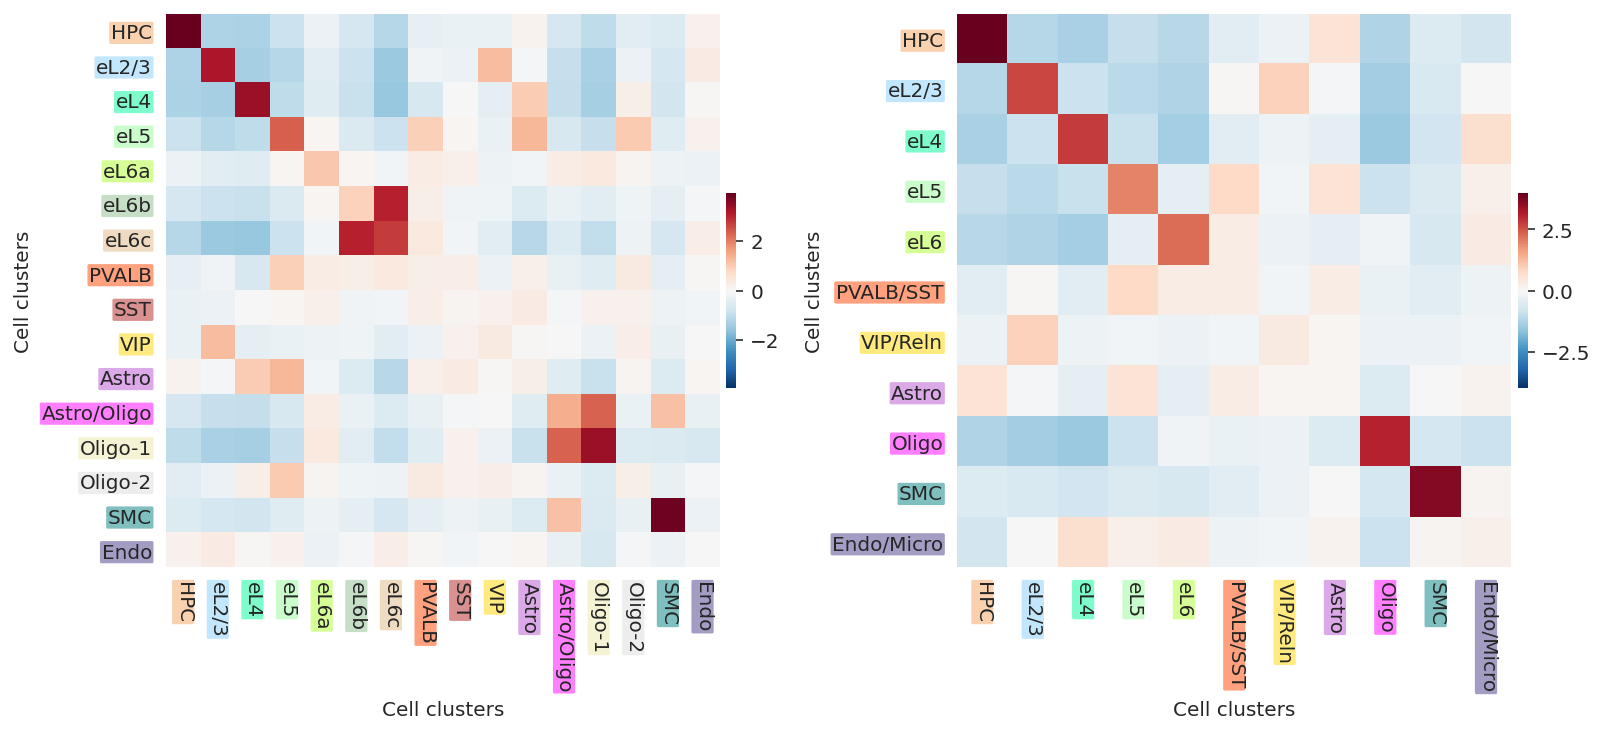

In [16]:
# plot the empirical affinity between cell types
segmentdata = copy.deepcopy(plt.get_cmap('RdBu')._segmentdata)
for channel in ['red', 'green', 'blue']:
    segmentdata[channel] = [(1.-i, k, j) for (i, j, k) in segmentdata[channel][::-1]]
cm = matplotlib.colors.LinearSegmentedColormap('', segmentdata=segmentdata, N=256)
kwargs = dict(
    cmap=cm,
)
fig, axes = plt.subplots(1, 2, figsize=(13, 6))
obj_SpiceMix.plotAffinityClusters(axes[0], ignores={'NA'}, **kwargs)
obj_NMF     .plotAffinityClusters(axes[1], ignores={'NA'}, **kwargs)

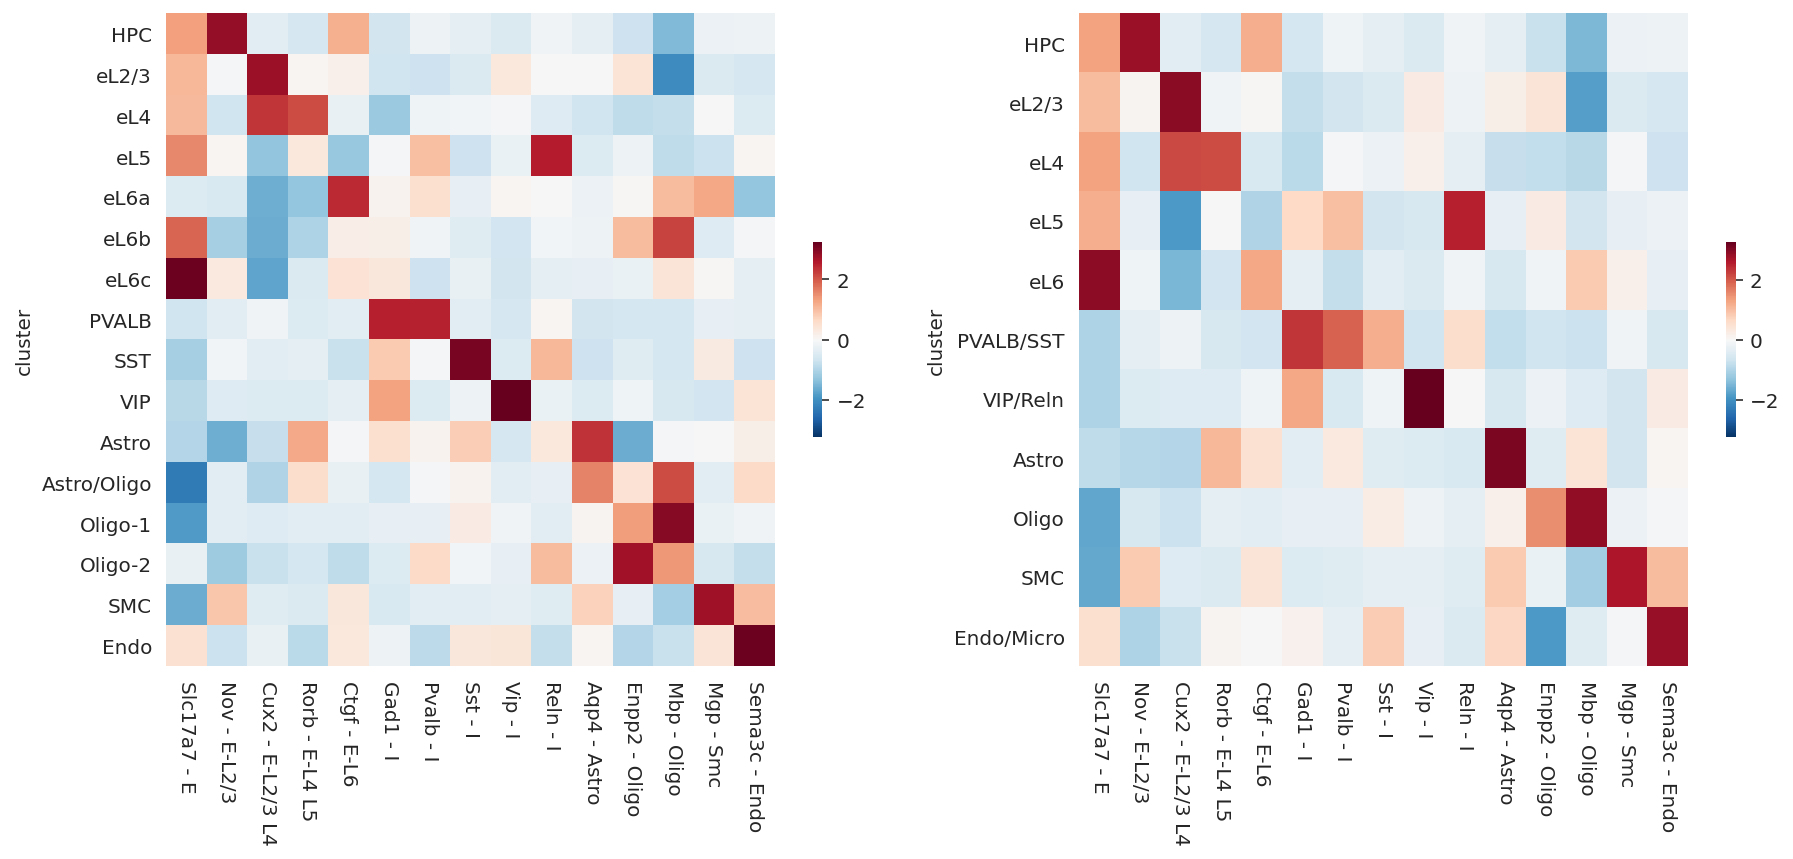

In [15]:
segmentdata = copy.deepcopy(plt.get_cmap('RdBu')._segmentdata)
for key in ['red', 'green', 'blue']:
    segmentdata[key] = [(1.-i, k, j) for (i, j, k) in segmentdata[key][::-1]]
cm = matplotlib.colors.LinearSegmentedColormap('', segmentdata=segmentdata, N=256)
kwargs=dict(
    cmap=cm,
)

# In the first column are the gene IDs, and in the second column are annotations, 
#   which are cell types in this example
gene_list_plot = np.array([
    ('Slc17a7',	'E'), # putative marker of all excitatory neural types
    ('Nov',		'E-L2/3'), # STARmap, Fig. 2J
    ('Cux2',	'E-L2/3 L4'), # STARmap, Fig. 2J
    ('Rorb',	'E-L4 L5'), # STARmap, Fig. 2J
    ('Ctgf',	'E-L6'), # STARmap, Fig. 2J & tasic
    
    ('Gad1',	'I'), # putative marker of all inhibitory neural types
    ('Pvalb',	'I'), # putative marker of PVALB subtype
    ('Sst',		'I'), # putative marker of SST subtype
    ('Vip',		'I'), # putative marker of VIP subtype
    ('Reln',	'I'),
    
    ('Aqp4',	'Astro'), # tasic
    ('Enpp2',	'Oligo'), # STARmap Fig. S6B
    ('Mbp',		'Oligo'), # tasic
    ('Mgp',		'Smc'), # STARmap Fig. S6B
    ('Sema3c',	'Endo'), # STARmap Fig. S6B
])
# Extract gene IDs and prepend string 'expr '
keys_x = [f'expr {_[0]}' for _ in gene_list_plot]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
obj_SpiceMix.visualizeFeatureEnrichment(
    axes[0], keys_x=keys_x, **kwargs, ignores_y=['NA'],
    normalizer_raw=StandardScaler().fit_transform,
    normalizer_avg=lambda x: StandardScaler().fit_transform(x.T).T,
)
obj_NMF     .visualizeFeatureEnrichment(
    axes[1], keys_x=keys_x, **kwargs,
    normalizer_raw=StandardScaler().fit_transform,
    normalizer_avg=lambda x: StandardScaler().fit_transform(x.T).T,
)
for ax in axes:
    ax.set_xticklabels(' - '.join(_) for _ in gene_list_plot)